In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.corr()


,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


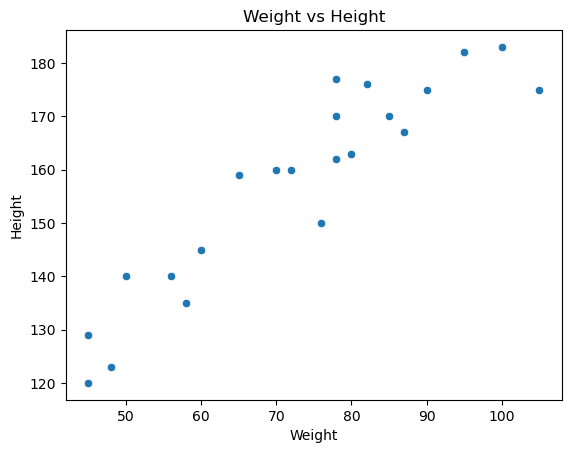

In [4]:
# Scatter plot
sns.scatterplot(data=df,x=df['Weight'],y= df['Height'])
plt.xlabel("Weight")  
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.show()


In [5]:
# independent and dependent features
# [['name']] is used to give dataframe format
X=df[['Weight']]    #independent features should always be in a dataframe format or a 2D numpy array
Y=df['Height']      #dependent feature can be in a series form or a 1D array

In [6]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [7]:
# Train Test data split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [8]:
# STANDARDISATION
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)   #fir_transform is used for training data and transform for test data


In [9]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [10]:
X_test=scaler.transform(X_test)

In [11]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regression=LinearRegression()

In [14]:
regression.fit(X_train,Y_train)

LinearRegression()

In [15]:
regression.coef_

array([17.2982057])

In [16]:
regression.intercept_

156.47058823529412

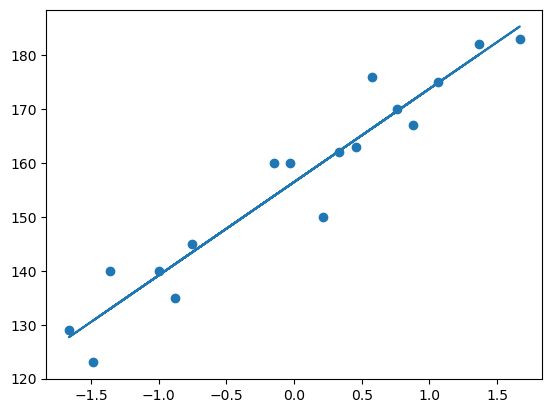

In [17]:
# plot train data and best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))    #just wow


In [30]:
#  prediction for test data
y_predict=regression.predict(X_test)
y_predict

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [31]:
# performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
mse=mean_squared_error(Y_test,y_predict)
mae=mean_absolute_error(Y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [33]:
from sklearn.metrics import r2_score
r2score=r2_score(Y_test,y_predict)
r2score

0.7360826717981276

In [34]:
# predicting data
regression.predict(scaler.transform([[72]]))

c:\Users\Nitin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [35]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [36]:
model.summary()

c:\Users\Nitin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 14 Jul 2025   Prob (F-statistic):                       0.664
Time:                        13:07:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
regression.coef_

array([17.2982057])

In [38]:
regression.intercept_

156.47058823529412